In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('data/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [152]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [153]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [154]:
continuous_f = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_f = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_f

['cut', 'color', 'clarity']

In [155]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [156]:
df.duplicated().value_counts()

False    53794
True       146
Name: count, dtype: int64

In [157]:
df.drop_duplicates(inplace=True)

In [158]:
df[continuous_f].describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [159]:
df[categorical_f].describe()

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [160]:
df['clarity'].value_counts()


clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [161]:
df = df.drop(columns=['x','y','z'], axis=1)

In [162]:
continuous_f = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_f = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_f

['cut', 'color', 'clarity']

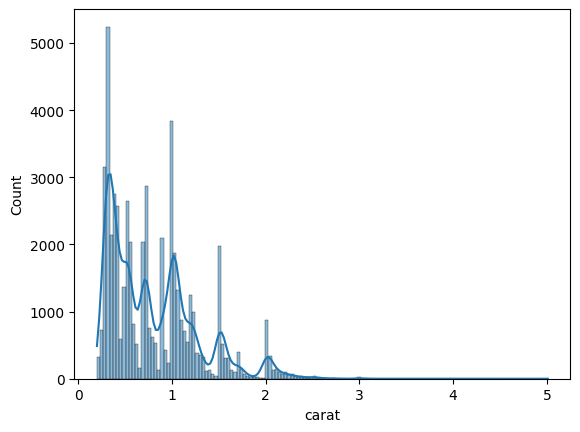

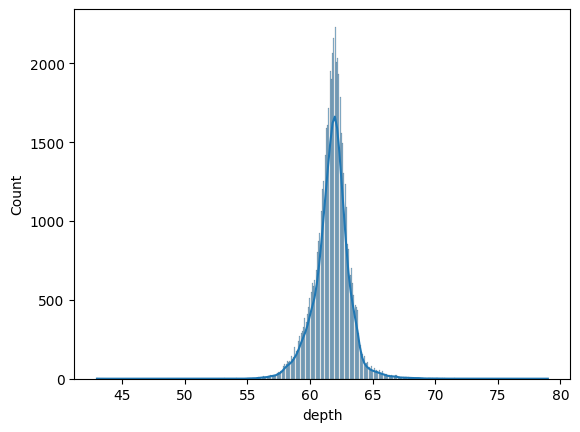

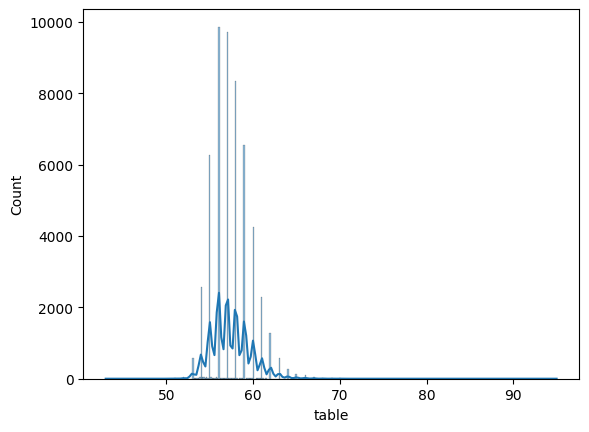

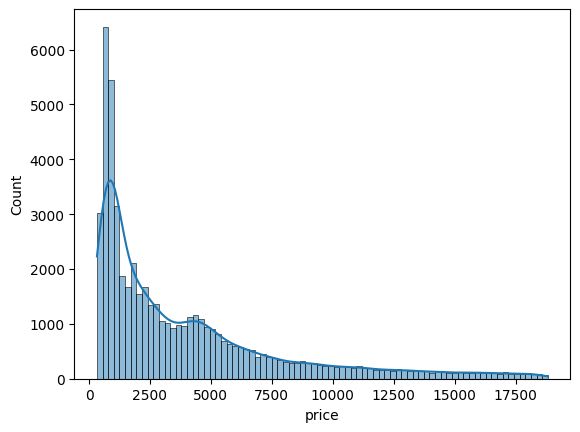

In [163]:
for i in continuous_f:
    sns.histplot(data=df,x = i, kde=True)
    print('\n')
    plt.show()
    

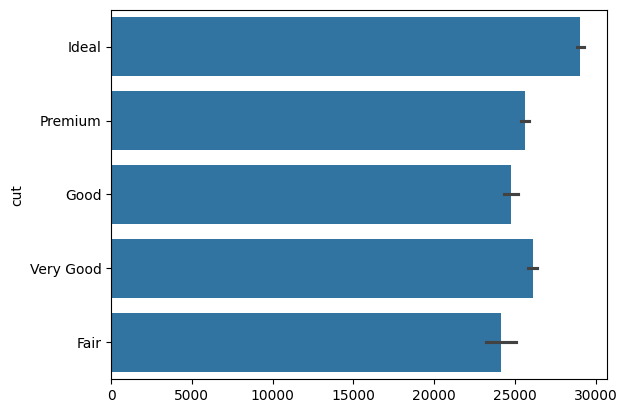

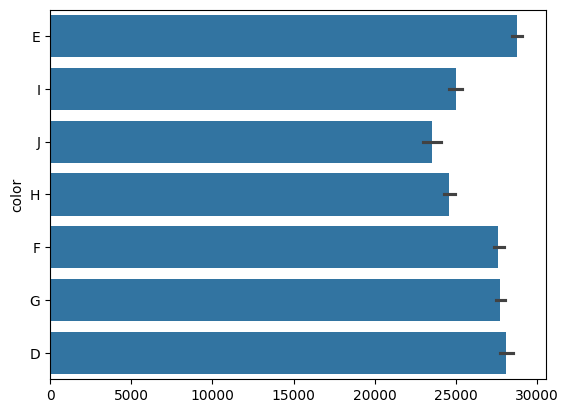

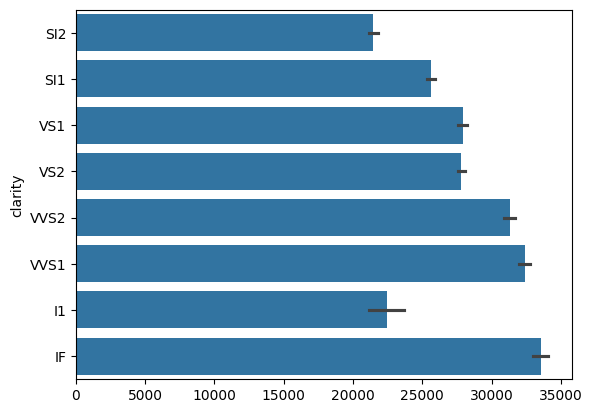

In [164]:
for i in categorical_f:
    sns.barplot(data=df[i])
    print('\n')
    plt.show()
    

<Axes: >

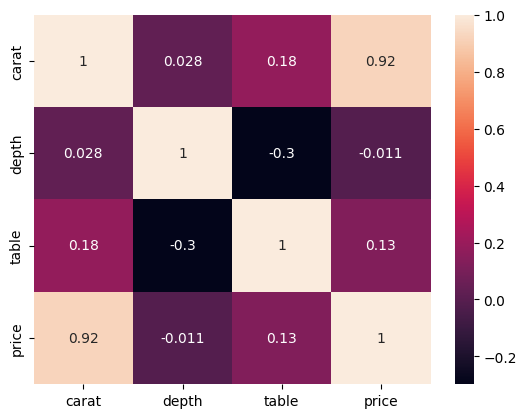

In [165]:
sns.heatmap(data = df[continuous_f].corr(), annot=True)

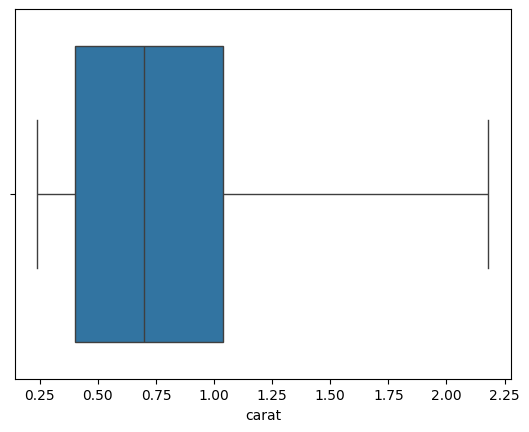

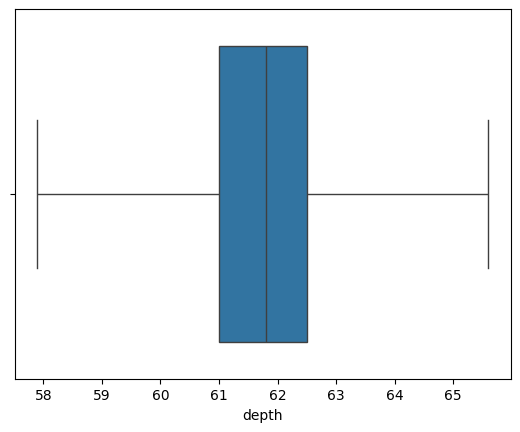

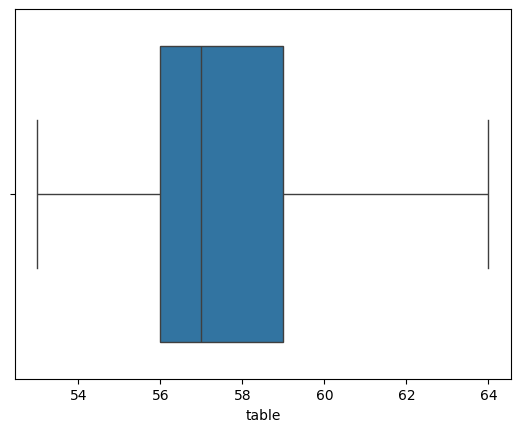

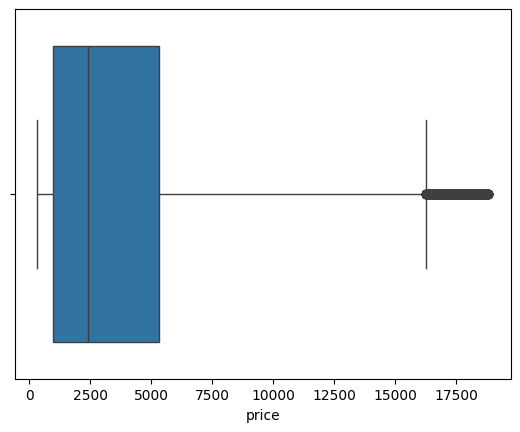

In [170]:

for i in continuous_f:
    sns.boxplot(data= df[continuous_f],x = i,whis=2.5)
    print('\n')
    plt.show()
    

In [169]:
import numpy as np
lower_limit = df['carat'].quantile(0.01)
upper_limit = df['carat'].quantile(0.99)
df['carat'] = np.clip(df['carat'], lower_limit, upper_limit)


In [140]:
df

,carat,cut,color,clarity,depth,table,price
0,0.24,Ideal,E,SI2,61.5,55.0,326
1,0.24,Premium,E,SI1,59.8,61.0,326
2,0.24,Good,E,VS1,57.9,64.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [171]:
cut_map= {'Fair': 1, 'Good':2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_map = {'SI1':3,'VS2':4,'SI2':2,'VS1':5,'VVS2':6,'VVS1':7,'IF':8,'I1':1}
color_map = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}


In [172]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [174]:
continuous_f = ['carat', 'depth', 'table']

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the selected features
df[continuous_f] = scaler.fit_transform(df[continuous_f])



In [177]:
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have standardized features X_standardized and target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (you can replace this with other regression models)
model = RandomForestRegressor()

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# Choose an appropriate scoring metric (e.g., 'neg_mean_squared_error' for MSE)
scoring_metric = 'neg_mean_squared_error'

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_metric, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using the chosen scoring metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error on Test Set: 279626.30554759916


In [184]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

R-squared on Test Set: 0.9816543093204393


In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Define the linear regression model
linear_model = LinearRegression()

# Optionally, you can perform hyperparameter tuning using GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error on Test Set: 1361541.7654570758


In [181]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

R-squared on Test Set: 0.910672123541944
